<a href="https://colab.research.google.com/github/stm010/dsci100/blob/main/tide_analysis_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd


**Analyzing Tide**

In this homework you will be visualizing and working with a tide data set from Steveston (here at Richmond).

The city of Richmond is located on an island (Lulu island) and is protected against floods by a dyke with an extenssive stations of pumps.
If the sea level will rise then these dykes will need to be ellevated.

Your mission is to recommnd an action based on the tide data that is supplied.

   Unnamed: 0          Datetime  Height
0           0  2020/07/28 01:00    3.35
1           1  2020/07/28 02:00    2.84
2           2  2020/07/28 03:00    2.26
3           3  2020/07/28 04:00    1.70
4           4  2020/07/28 05:00    1.27
Unnamed: 0      int64
Datetime       object
Height        float64
dtype: object


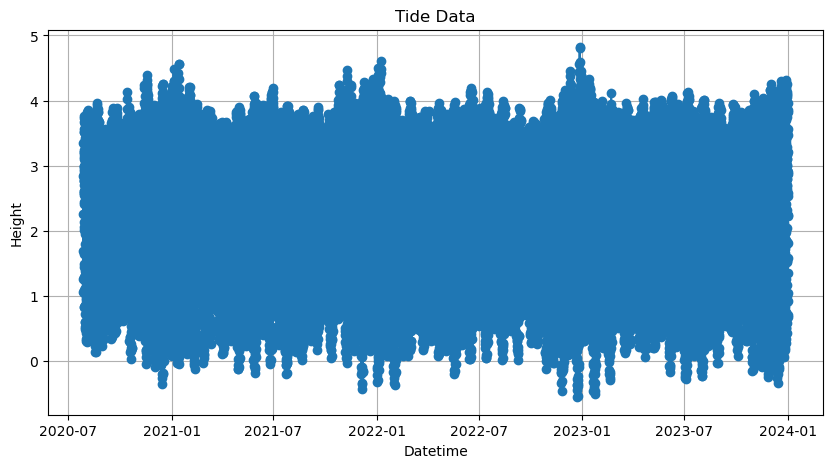

In [ ]:
df = pd.read_csv("/Users/niloufar/Library/CloudStorage/OneDrive-UBC/TA_DSCI100_2025/First_Assignment/tide_data_2020_2024.csv", sep=",")

print(df.head())  # Should have "Datetime" and "Height" as normal columns
print(df.dtypes)

# Plot things
df["Datetime"] = pd.to_datetime(df["Datetime"], errors="coerce")
plt.figure(figsize=(10, 5))
plt.plot(df["Datetime"], df["Height"], marker="o", linestyle="-")
plt.xlabel("Datetime")
plt.ylabel("Height")
plt.title("Tide Data")
plt.grid(True)
plt.show()


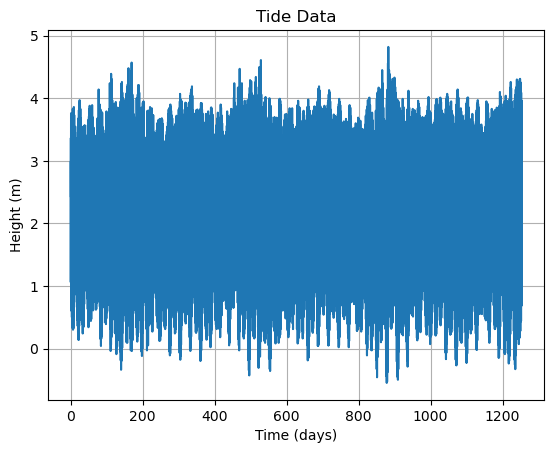

In [ ]:
# Access the 'Date' column
# Make everything into arrays so we can crunch numbers
time_series = pd.to_datetime(df['Datetime'])
time_diffs = (time_series - time_series[0]).dt.total_seconds()

# Convert to PyTorch tensor in days
t = torch.tensor(time_diffs, dtype=torch.float32)
t = t/60/60/24

h = torch.tensor(df['Height'].values, dtype=torch.float32)

plt.plot(t, h)
plt.xlabel("Time (days)")
plt.ylabel("Height (m)")
plt.title("Tide Data")
plt.grid(True)
plt.show()


**Homework Questions**

Using python commands

1. Find the length of the time series.

2. Find the maximum height over all times

3. Find the minimum time over all times

4. To determine if we see a significant change in tide levels we will average things over time. Take the first 30000 values of the height and reorganize them in an array (matrix) of size $200 \times 150$.

5. Look at 3 different metrics.
  a) The mean over all the 200 values
  b) The max over all 200 values
  c) The min over all 200 values.

  For each of these cases you should get a vector of size 150. This vector represent the max/min/averagre over a window of 300 measurements.

6. Plot the three vectors over one graph. Based on this plot, is the sea around Richmond rising?

In [ ]:
#Answer to question 1
# Based on the above plot, you can take the length of either t or h to get the number of data points.
# The length of t and h are the same, so you can use either one.
num_data_points = len(t)
print(num_data_points)

30050


In [ ]:
#Answer to question 2
# All you need to do is find the max value of h (height).
max_height = torch.max(h)
print(max_height)

tensor(4.8200)


In [ ]:
#Answer to question 3
# All you need to do is find the min value of t (time).
min_time =  df['Datetime'].min()
print(min_time)

2020-07-28 01:00:00


In [ ]:
#Answer to question 4
# First, you need to select the first 30000 data points h.
# Then, you need to reshape it to a matrxi form.

tide_data = h[:30000].reshape(200, 150)
print(tide_data)


tensor([[3.3500, 2.8400, 2.2600,  ..., 3.4600, 3.3400, 2.9800],
        [2.4200, 1.8000, 1.1800,  ..., 2.5100, 2.3100, 2.0200],
        [1.7400, 1.5000, 1.4300,  ..., 3.3400, 3.3600, 3.2800],
        ...,
        [1.1200, 0.5000, 0.0600,  ..., 1.9900, 1.4600, 0.9200],
        [0.4700, 0.2400, 0.4200,  ..., 3.6800, 3.6200, 3.4500],
        [3.2300, 3.1000, 3.0800,  ..., 3.8500, 3.5200, 3.2300]])


In [ ]:
#Answer to question 5
# The question might be a little confusing, but as it asked for the mean of the all over 200 values; meaning you need to do operation of the the columns levels.

tide_data_mean_over_comluns = torch.mean(tide_data, dim=0)
tide_data_max_over_comluns = torch.max(tide_data, dim=0)[0]
tide_data_min_over_comluns = torch.min(tide_data, dim=0)[0]

print(tide_data_mean_over_comluns)
print(tide_data_max_over_comluns)
print(tide_data_min_over_comluns)

#Sanity check
print(tide_data_mean_over_comluns.shape)
print(tide_data_max_over_comluns.shape)
print(tide_data_min_over_comluns.shape)


tensor([2.4037, 2.3940, 2.3832, 2.3789, 2.3827, 2.3912, 2.4008, 2.4087, 2.4167,
        2.4221, 2.4160, 2.4085, 2.3963, 2.3825, 2.3663, 2.3551, 2.3570, 2.3648,
        2.3753, 2.3910, 2.4081, 2.4215, 2.4244, 2.4192, 2.4153, 2.4093, 2.3967,
        2.3856, 2.3785, 2.3819, 2.3901, 2.4002, 2.4086, 2.4154, 2.4184, 2.4146,
        2.4047, 2.3945, 2.3819, 2.3689, 2.3591, 2.3640, 2.3730, 2.3826, 2.3958,
        2.4093, 2.4186, 2.4174, 2.4148, 2.4136, 2.4064, 2.3941, 2.3840, 2.3809,
        2.3840, 2.3911, 2.3967, 2.4040, 2.4111, 2.4085, 2.4052, 2.3953, 2.3864,
        2.3733, 2.3621, 2.3559, 2.3598, 2.3709, 2.3814, 2.3930, 2.4091, 2.4231,
        2.4228, 2.4192, 2.4164, 2.4048, 2.3963, 2.3866, 2.3816, 2.3839, 2.3860,
        2.3897, 2.3968, 2.3997, 2.3964, 2.3872, 2.3761, 2.3672, 2.3558, 2.3456,
        2.3440, 2.3537, 2.3686, 2.3828, 2.3960, 2.4139, 2.4226, 2.4235, 2.4163,
        2.4053, 2.3965, 2.3858, 2.3761, 2.3747, 2.3783, 2.3844, 2.3917, 2.3985,
        2.4010, 2.4000, 2.3892, 2.3796, 

In [ ]:
print(tide_data_mean_over_comluns)

tensor([2.4037, 2.3940, 2.3832, 2.3789, 2.3827, 2.3912, 2.4008, 2.4087, 2.4167,
        2.4221, 2.4160, 2.4085, 2.3963, 2.3825, 2.3663, 2.3551, 2.3570, 2.3648,
        2.3753, 2.3910, 2.4081, 2.4215, 2.4244, 2.4192, 2.4153, 2.4093, 2.3967,
        2.3856, 2.3785, 2.3819, 2.3901, 2.4002, 2.4086, 2.4154, 2.4184, 2.4146,
        2.4047, 2.3945, 2.3819, 2.3689, 2.3591, 2.3640, 2.3730, 2.3826, 2.3958,
        2.4093, 2.4186, 2.4174, 2.4148, 2.4136, 2.4064, 2.3941, 2.3840, 2.3809,
        2.3840, 2.3911, 2.3967, 2.4040, 2.4111, 2.4085, 2.4052, 2.3953, 2.3864,
        2.3733, 2.3621, 2.3559, 2.3598, 2.3709, 2.3814, 2.3930, 2.4091, 2.4231,
        2.4228, 2.4192, 2.4164, 2.4048, 2.3963, 2.3866, 2.3816, 2.3839, 2.3860,
        2.3897, 2.3968, 2.3997, 2.3964, 2.3872, 2.3761, 2.3672, 2.3558, 2.3456,
        2.3440, 2.3537, 2.3686, 2.3828, 2.3960, 2.4139, 2.4226, 2.4235, 2.4163,
        2.4053, 2.3965, 2.3858, 2.3761, 2.3747, 2.3783, 2.3844, 2.3917, 2.3985,
        2.4010, 2.4000, 2.3892, 2.3796, 

In [ ]:
# A few things to note:
# 1. If you'd like to get mean, max, and min values of the entire dataset, you can use the following code:
mean = torch.mean(h)
max = torch.max(h)
min = torch.min(h)
print(f"mean, max, min: {mean}\n, {max}\n, {min}\n")
# 2. If you'd like to get mean, max, and min values over the 200 values, you can use the following code:
tide_data_mean_over_rows = torch.mean(tide_data, dim=1)
tide_data_max_over_rows = torch.max(tide_data, dim=1)[0]
tide_data_min_over_rows = torch.min(tide_data, dim=1)[0]
print(f"mean_over_cloumns, max_over_cloumns, min_over_cloumns: {tide_data_mean_over_rows}\n, {tide_data_max_over_rows}\n, {tide_data_min_over_rows}\n")

#The [0] at the end of the max and min functions is to get the values. This is because the max and min functions return a tuple with the max/min values and their indices. We only want the values, so we use [0] to get them. The mean function only returns the mean value, so we don't need to use [0] for that.

mean, max, min: 2.3915328979492188
, 4.820000171661377
, -0.550000011920929

mean_over_cloumns, max_over_cloumns, min_over_cloumns: tensor([2.5149, 2.3372, 2.3253, 2.4477, 2.3617, 2.2931, 2.3173, 2.4021, 2.3553,
        2.4343, 2.3483, 2.3811, 2.3612, 2.3188, 2.2373, 2.3495, 2.3482, 2.5400,
        2.4667, 2.3026, 2.2765, 2.3737, 2.5197, 2.3162, 2.5283, 2.6785, 2.5511,
        2.3787, 2.3370, 2.5553, 2.5166, 2.3055, 2.3878, 2.2804, 2.2015, 2.4369,
        2.3377, 2.4029, 2.2090, 2.1796, 2.2614, 2.1117, 2.2265, 2.3529, 2.3308,
        2.2205, 2.2837, 2.3711, 2.4521, 2.3479, 2.4777, 2.4687, 2.4504, 2.5303,
        2.4926, 2.4758, 2.3741, 2.3682, 2.3539, 2.4182, 2.3234, 2.3626, 2.4089,
        2.3823, 2.3003, 2.2837, 2.3653, 2.2879, 2.4189, 2.2957, 2.3421, 2.3654,
        2.7213, 2.4321, 2.6686, 2.4545, 2.4284, 2.4278, 2.5083, 2.4156, 2.6135,
        2.5677, 2.5791, 2.5430, 2.5671, 2.4585, 2.3058, 2.2882, 2.3347, 2.1507,
        2.2123, 2.2373, 2.3123, 2.2277, 2.2547, 2.4023, 2.3031, 2.29

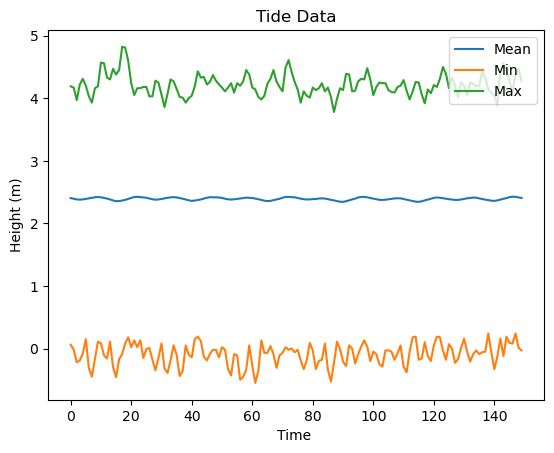

In [ ]:
# Answer to question 6
plt.plot(tide_data_mean_over_comluns, label="Mean")
plt.plot(tide_data_min_over_comluns, label="Min")
plt.plot(tide_data_max_over_comluns, label="Max")
plt.xlabel("Time ")
plt.ylabel("Height (m)")
plt.title("Tide Data")
plt.legend()